In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
# Imports and path to files

In [0]:
!pip install fastai

In [0]:
from fastai.text import *

In [0]:
path = 'gdrive/My Drive/ML Colab'
path = Path(path)

In [0]:
df = pd.read_csv(path/'stanford_sentiment.csv')

In [0]:
df.tail()

,label,text
79649,Negative,"an often deadly boring , strange reading of a ..."
79650,Negative,the problem with concept films is that if the ...
79651,Negative,"safe conduct , however ambitious and well inte..."
79652,Negative,"a film made with as little wit , interest , an..."
79653,Negative,"but here 's the real damn it is n't funny , ei..."


In [0]:
df['text'][1]

'splash'

In [0]:
# Create databunches, abstraction for preprocessing and parsing of data

In [0]:
data_lm = TextLMDataBunch.from_csv(path, 'stanford_sentiment.csv')

In [0]:
data_clas = TextClasDataBunch.from_csv(path, 'stanford_sentiment.csv', vocab=data_lm.train_ds.vocab, bs=32)

In [0]:
data_clas.show_batch()

text,target
"xxbos the film is faithful to what one presumes are the book 's twin premises that we become who we are on the xxunk of our parents , but we have no idea who they were at our age and that time is a fleeting and precious xxunk no matter how old you are .",Positive
"xxbos notwithstanding my problem with the movie 's final half hour , i ' m going to recommend secretary , based on the wonderful acting clinic put on by spader and gyllenhaal , and also the unique way shainberg goes about telling what at heart is a sweet little girl",Positive
"xxbos ... by the time it 's done with us , mira nair 's new movie has its audience giddy with the delight of discovery , of having been immersed in a foreign culture only to find that human nature is pretty much the same all over .",Positive
"xxbos was when green threw medical equipment at a window not because it was particularly funny , but because i had a serious urge to grab the old lady at the end of my aisle 's walker and toss it at the screen in frustration .",Negative
"xxbos frei assembles a fascinating profile of a deeply humanistic artist who , in spite of all that he 's witnessed , remains surprisingly idealistic , and retains an extraordinary faith in the ability of images to communicate the truth of the world around him .",Positive


In [0]:
data_lm.save('data_lm_export.pkl')

In [0]:
data_clas.save('data_clas_export.pkl')

In [0]:
data_lm = load_data(path, 'data_lm_export.pkl')

In [0]:
data_clas = load_data(path, 'data_clas_export.pkl', bs=16)

In [0]:
# Create language model learner, abstraction for model architecture. Choose learning rates and number of epochs. 

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.728093,4.146897,0.302896,01:10
1,3.814602,3.764106,0.351872,01:09


In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.335245,3.357190,0.411802,01:26
1,2.884045,2.857155,0.504161,01:26
2,2.416158,2.557900,0.561544,01:26
3,2.132915,2.441000,0.584312,01:26
4,1.994356,2.418997,0.588399,01:26


In [0]:
learn.predict("How do", n_words=5)

'How do they need to realize that'

In [0]:
learn.save_encoder('ft_enc')

In [0]:
# Create text classifier learner. Uses the same model architecture (AWD_LSTM). Choose learning rates and number of epochs. 

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (63723 items)
x: TextList
xxbos dumbed down approach,xxbos steven soderbergh 's earlier films,xxbos thoroughly overbearing,xxbos does n't match his ambition,xxbos a passable family film
y: CategoryList
Negative,Positive,Negative,Negative,Positive
Path: gdrive/My Drive/ML Colab;

Valid: LabelList (15931 items)
x: TextList
xxbos with liberal doses of dark humor , gorgeous exterior photography , and a stable full of solid performances,xxbos face is chillingly unemotive,xxbos contrived banter,xxbos coming through in the end,xxbos the off center humor is a constant , and the ensemble gives it a buoyant delivery
y: CategoryList
Positive,Negative,Negative,Positive,Positive
Path: gdrive/My Drive/ML Colab;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(14416, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(14416, 400, padding_idx=1)
      )
    

In [0]:
data_clas.show_batch()

text,target
"xxbos the film is faithful to what one presumes are the book 's twin premises that we become who we are on the xxunk of our parents , but we have no idea who they were at our age and that time is a fleeting and precious xxunk no matter how old you are .",Positive
"xxbos thinking about how good it all was , and started doing nothing but reacting to it feeling a part of its grand locations , thinking urgently as the protagonists struggled , feeling at the mercy of its inventiveness , gasping at its visual delights",Positive
"xxbos s ... worth the extra effort to see an artist , still committed to growth in his ninth decade , change while remaining true to his principles with a film whose very subject is , quite pointedly , about the peril of such efforts",Positive
"xxbos while parker and co writer catherine di napoli are faithful to melville 's plotline , they and a fully engaged supporting cast ... have made the old boy 's characters more quick witted than any english lit major would have thought possible .",Positive
"xxbos a depressing xxunk of everything those of us who do n't object to the description ` ` xxunk '' have suspected all along george w. bush is an xxunk , xxunk , xxunk frat boy with a mean streak a mile wide .",Negative


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02
Min loss divided by 10: 1.20E-02


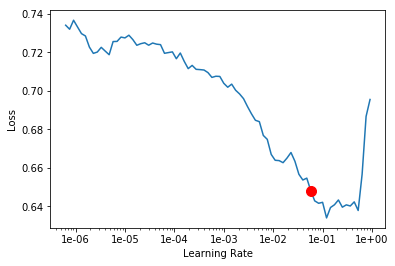

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5, 5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.579062,0.450147,0.789090,02:01
1,0.544734,0.610438,0.775846,02:15
2,0.541656,0.478631,0.768690,02:11
3,0.524320,0.429986,0.801958,02:01
4,0.493669,0.419886,0.810181,02:08


In [0]:
learn.freeze_to(-2)

In [0]:
learn.fit_one_cycle(1, slice(5e-3/2., 5e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.474384,10.629342,0.814010,02:36


In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(2e-3/100, 5e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.416463,1.606961,0.855941,05:14
1,0.313607,0.589942,0.898751,04:48
2,0.226129,0.226856,0.916076,05:21
3,0.146635,0.233341,0.921097,04:59
4,0.159966,0.211366,0.926433,04:48


In [0]:
data_clas.classes

['Negative', 'Positive']

In [0]:
preds, targets = learn.get_preds()

predictions = np.argmax(preds, axis = 1)
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,6667,606
1,566,8092


In [0]:
learn.predict("it was a garbage movie with little plot development")

(Category Negative, tensor(0), tensor([0.9923, 0.0077]))

Uncomment the following cell when you are happy with the model's performance and want to export it to a pickel file:

In [0]:
learn.export()

In [0]:
df.label.value_counts()

Positive    43612
Negative    36042
Name: label, dtype: int64